In [185]:
%%capture
import time
! pip install seaborn
import matplotlib as plot 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot

%matplotlib inline

In [186]:
df = pd.read_csv('15_9-F-1.csv')

In [187]:
df.head()

Depth    CALI    DRHO       DT        GR    NPHI     PEF  RACEHM  RACELM  \
0  3319.7  8.6250  0.0522  68.4529  129.2796  0.1098  7.3899  2.2658  1.7305   
1  3319.8  8.6250  0.0698  68.2099   94.5679  0.1054  7.0959  2.2316  1.7552   
2  3319.9  8.6250  0.0834  67.8057   72.4837  0.1051  6.7799  1.7440  1.6347   
3  3320.0  8.6250  0.0897  67.1666   58.2152  0.1047  6.4901  1.6227  1.6219   
4  3320.1  8.6016  0.0875  66.6090   52.7115  0.1061  6.2783  1.8232  1.6507   

       RD  ...      ROP  RPCEHM  RPCELM      RT     BVW   KLOGH    PHIF  \
0  1.4654  ...  19.7997  1.3082  1.4654  1.3082  0.0200  0.0010  0.0200   
1  1.5045  ...  19.7936  1.4833  1.5045  1.4833  0.0200  0.0010  0.0200   
2  1.7399  ...  19.8061  1.9602  1.7400  1.9602  0.0200  0.0017  0.0200   
3  1.9330  ...  19.8185  2.4704  1.9330  2.4704  0.0238  0.0306  0.0238   
4  1.9649  ...  19.8310  2.5638  1.9649  2.5638  0.0413  0.1252  0.0413   

   SAND_FLAG   SW     VSH  
0          0  1.0  0.7446  
1          0  1.0  0.7582  
2          0  1.0  0.5477  
3          0  1.0  0.4117  
4          0  1.0  0.3592  

[5 rows x 22 columns]

In [5]:
# Lets drop first row.Uncomment if the table has units in first row

#df_data = df_data.iloc[1:]
#df_data.head(10)

In [188]:
# Let's select appropriate variables as some logs are redundant or similar.

df_data = df.drop(['Depth', 'VSH', 'BVW', 'SAND_FLAG', 'RPCEHM', 'RPCELM', 'RM'], 1)

df_data.head(10)

CALI    DRHO       DT        GR    NPHI     PEF  RACEHM  RACELM      RD  \
0  8.6250  0.0522  68.4529  129.2796  0.1098  7.3899  2.2658  1.7305  1.4654   
1  8.6250  0.0698  68.2099   94.5679  0.1054  7.0959  2.2316  1.7552  1.5045   
2  8.6250  0.0834  67.8057   72.4837  0.1051  6.7799  1.7440  1.6347  1.7399   
3  8.6250  0.0897  67.1666   58.2152  0.1047  6.4901  1.6227  1.6219  1.9330   
4  8.6016  0.0875  66.6090   52.7115  0.1061  6.2783  1.8232  1.6507  1.9649   
5  8.5781  0.0780  66.1610   49.0997  0.1039  6.1793  1.7311  1.6465  1.9217   
6  8.5781  0.0654  66.1457   45.4738  0.1025  6.1808  1.7333  1.6672  1.9511   
7  8.5781  0.0542  67.0796   41.5641  0.1022  6.2401  1.7250  1.6774  2.0205   
8  8.5781  0.0479  68.6959   39.2817  0.1033  6.2972  1.6423  1.6583  2.0447   
9  8.5781  0.0478  71.1105   38.7313  0.1055  6.2730  1.5301  1.6384  2.0893   

     RHOB      ROP      RT   KLOGH    PHIF      SW  
0  2.6320  19.7997  1.3082  0.0010  0.0200  1.0000  
1  2.6426  19.7936  1.4833  0.0010  0.0200  1.0000  
2  2.6377  19.8061  1.9602  0.0017  0.0200  1.0000  
3  2.6180  19.8185  2.4704  0.0306  0.0238  1.0000  
4  2.5872  19.8310  2.5638  0.1252  0.0413  1.0000  
5  2.5516  19.8248  2.4063  0.3706  0.0615  1.0000  
6  2.5207  19.8187  2.4613  1.0484  0.0791  1.0000  
7  2.4993  19.8125  2.6281  2.8390  0.0913  0.9821  
8  2.4884  19.8083  2.7591  4.9960  0.0975  0.8976  
9  2.4844  19.8040  2.9998  5.8095  0.0998  0.8412

In [5]:
df_data.dtypes

CALI      float64
DRHO      float64
DT        float64
GR        float64
NPHI      float64
PEF       float64
RACEHM    float64
RACELM    float64
RD        float64
RHOB      float64
ROP       float64
RT        float64
KLOGH     float64
PHIF      float64
SW        float64
dtype: object

## Evaluating for Missing Data
To proceed, missing data needs to be accounted for and the necessary cleaning process (remove or replace) applied.

In [6]:
# Count missing data if present
missing_df_data = df_data.isnull()
for column in missing_df_data.columns.values.tolist():
    print(column)
    print (missing_df_data[column].value_counts())
    print("")

CALI
False    2793
Name: CALI, dtype: int64

DRHO
False    2793
Name: DRHO, dtype: int64

DT
False    2793
Name: DT, dtype: int64

GR
False    2793
Name: GR, dtype: int64

NPHI
False    2793
Name: NPHI, dtype: int64

PEF
False    2793
Name: PEF, dtype: int64

RACEHM
False    2793
Name: RACEHM, dtype: int64

RACELM
False    2793
Name: RACELM, dtype: int64

RD
False    2793
Name: RD, dtype: int64

RHOB
False    2793
Name: RHOB, dtype: int64

ROP
False    2793
Name: ROP, dtype: int64

RT
False    2793
Name: RT, dtype: int64

KLOGH
False    2793
Name: KLOGH, dtype: int64

PHIF
False    2793
Name: PHIF, dtype: int64

SW
False    2793
Name: SW, dtype: int64



### Well log visualisation

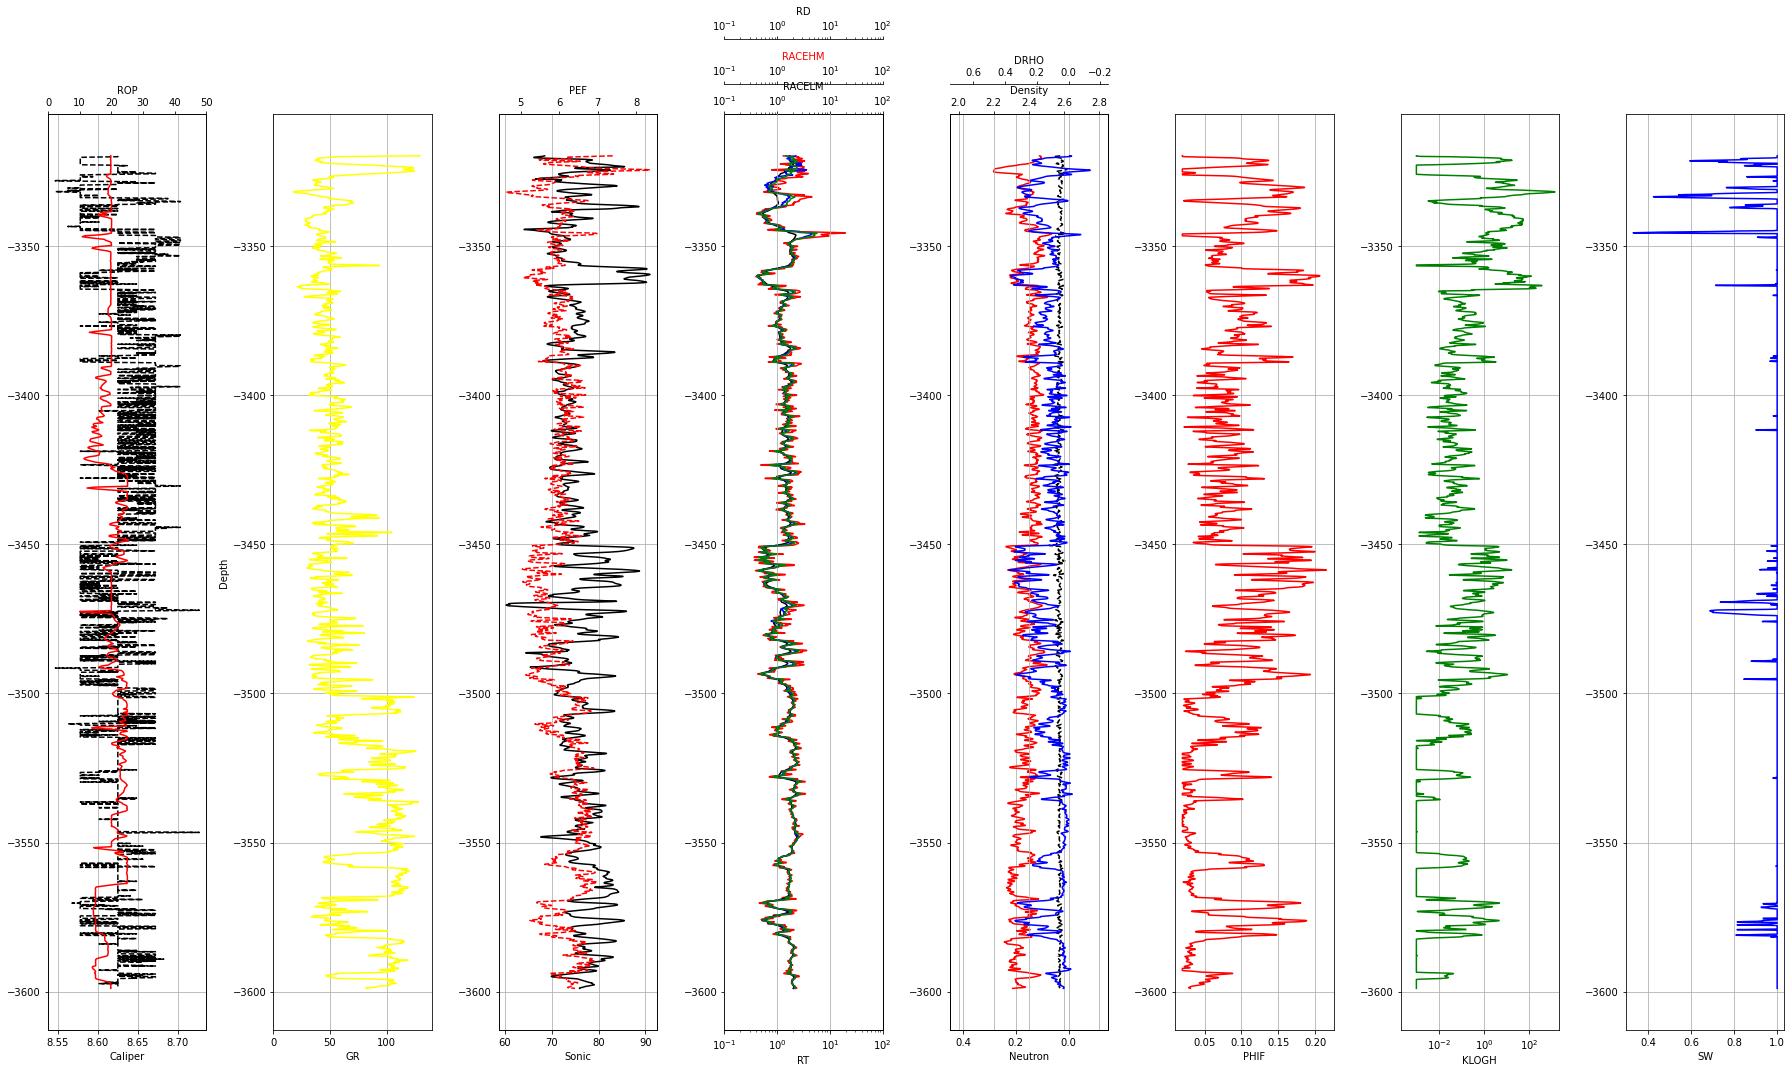

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(25, 15))

axes[0].plot(df.CALI, -df.Depth, c="black", linestyle='--')
axes[0].set_xlabel("Caliper", color='black')
axes0= axes[0].twiny()
axes0.plot(df.ROP, -df.Depth, c="red")
axes0.set_xlabel("ROP", color="black")
axes0.set_xlim(0, 50)
axes[0].grid(which='both', axis='both')

axes[1].plot(df.GR, -df.Depth, c="yellow")
axes[1].set_xlim([0, 140])
axes[1].set_ylabel("Depth")
axes[1].set_xlabel("GR")
axes[1].get_yaxis().set_visible(True)
axes[1].grid(which='both', axis='both')

axes[2].plot(df.DT, -df.Depth, c="black")
axes[2].set_xlabel("Sonic")
axes[2].get_yaxis().set_visible(True)
axes2= axes[2].twiny()
axes2.plot(df.PEF, -df.Depth, c="red", linestyle='--')
axes2.set_xlabel("PEF", color="black")
axes[2].grid(which='both', axis='both')

axes[3].plot(df.RT, -df.Depth, c="red")
axes[3].set_xlabel("RT")
axes[3].set_xscale('log')
axes[3].grid(True)
axes[3].get_yaxis().set_visible(True)
axes[3].set_xlim(0.1, 100)
axes[3].grid(True, which="both")

axes3= axes[3].twiny()
axes3.plot(df.RACELM, -df.Depth, c="black")
axes3.set_xlabel("RACELM")
axes3.set_xscale('log')
axes3.set_xlim(0.1, 100)

axes3_1= axes[3].twiny()
axes3_1.plot(df.RACEHM, -df.Depth, c="blue")
axes3_1.set_xlabel("RACEHM", color="red")
axes3_1.set_xscale('log')
axes3_1.spines['top'].set_position(('outward', 30))
axes3_1.set_xlim(0.1, 100)

axes3_2= axes[3].twiny()
axes3_2.plot(df.RD, -df.Depth, c="green")
axes3_2.set_xlabel("RD")
axes3_2.set_xscale('log')
axes3_2.spines['top'].set_position(('outward', 75))
axes3_2.set_xlim(0.1, 100)
plt.grid(True)
axes[3].grid(which='both', axis='both')

axes[4].plot(df.NPHI, -df.Depth, c="red")
axes[4].set_xlabel("Neutron")
axes[4].invert_xaxis()
axes[4].set_xlim(0.45, -0.15)
axes[4].get_yaxis().set_visible(False)
axes[4].grid(which='both', axis='both')

axes4= axes[4].twiny()
axes4.plot(df.DRHO, -df.Depth, c="black", linestyle='--')
axes4.set_xlabel("DRHO")
axes4.get_yaxis().set_visible(True)
axes4.set_xlim(0.75, -0.25)
axes4.spines['top'].set_position(('outward', 30))

axes4_1= axes[4].twiny()
axes4_1.plot(df.RHOB, -df.Depth, c="blue")
axes4_1.set_xlabel("Density")
axes4_1.set_xlim(1.95, 2.85)

axes[5].plot(df.PHIF, -df.Depth, c="red")
axes[5].set_xlabel("PHIF")
axes[5].get_yaxis().set_visible(True)
axes[5].grid(which='both', axis='both')

axes[6].plot(df.KLOGH, -df.Depth, c="green")
axes[6].set_xlabel("KLOGH")
axes[6].set_xscale('log')
axes[6].set_xlim(0.0002, 2000)
plt.gca().xaxis.grid(True, which='both')  # minor grid on too
axes[6].get_yaxis().set_visible(True)
plt.grid(True)
axes[6].grid(which='both', axis='both')

axes[7].plot(df.SW, -df.Depth, c="blue")
axes[7].set_xlabel("SW")
axes[7].get_yaxis().set_visible(True)
axes[7].grid(which='major', axis='both')

fig.tight_layout()

# save the plot as a file
fig.savefig('Well logs.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Descriptive Statistical Analysis
Analyse the variables by utilizing a description method.

The describe function automatically computes basic statistics for all continuous variables.

This will show:

- the count of that variable
- the mean
- the standard deviation (std)
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value

In [8]:
df_data.describe()

CALI         DRHO           DT           GR         NPHI  \
count  2793.000000  2793.000000  2793.000000  2793.000000  2793.000000   
mean      8.628917     0.058478    75.599622    62.542455     0.158161   
std       0.031583     0.010196     4.462628    25.892287     0.035820   
min       8.546900     0.010000    60.218300    17.725400     0.063600   
25%       8.625000     0.052800    72.578200    44.197400     0.130200   
50%       8.625000     0.058300    74.973300    52.476400     0.152800   
75%       8.648400     0.064000    77.929300    78.750400     0.185900   
max       8.726600     0.123200    90.983100   129.279600     0.284200   

               PEF       RACEHM       RACELM           RD         RHOB  \
count  2793.000000  2793.000000  2793.000000  2793.000000  2793.000000   
mean      6.055966     1.483614     1.417310     1.532716     2.517692   
std       0.433985     0.542811     0.464865     0.578272     0.078386   
min       4.618100     0.420100     0.447400     0.413500     2.286700   
25%       5.774200     1.099100     1.061300     1.139200     2.467400   
50%       6.046900     1.521500     1.455400     1.586000     2.530900   
75%       6.362700     1.853200     1.769100     1.898800     2.585100   
max       8.362300     4.702700     2.408700     5.699000     2.748600   

               ROP           RT        KLOGH         PHIF           SW  
count  2793.000000  2793.000000  2793.000000  2793.000000  2793.000000  
mean     20.009245     1.653878     5.110996     0.082992     0.988279  
std       3.169252     0.956317    48.904903     0.045241     0.055286  
min      10.001000     0.366400     0.001000     0.020000     0.329200  
25%      18.486300     1.141100     0.003100     0.043400     1.000000  
50%      19.982200     1.634500     0.043800     0.077100     1.000000  
75%      22.558900     2.012800     0.387200     0.111000     1.000000  
max      25.401400    19.624900  1332.587000     0.214900     1.000000

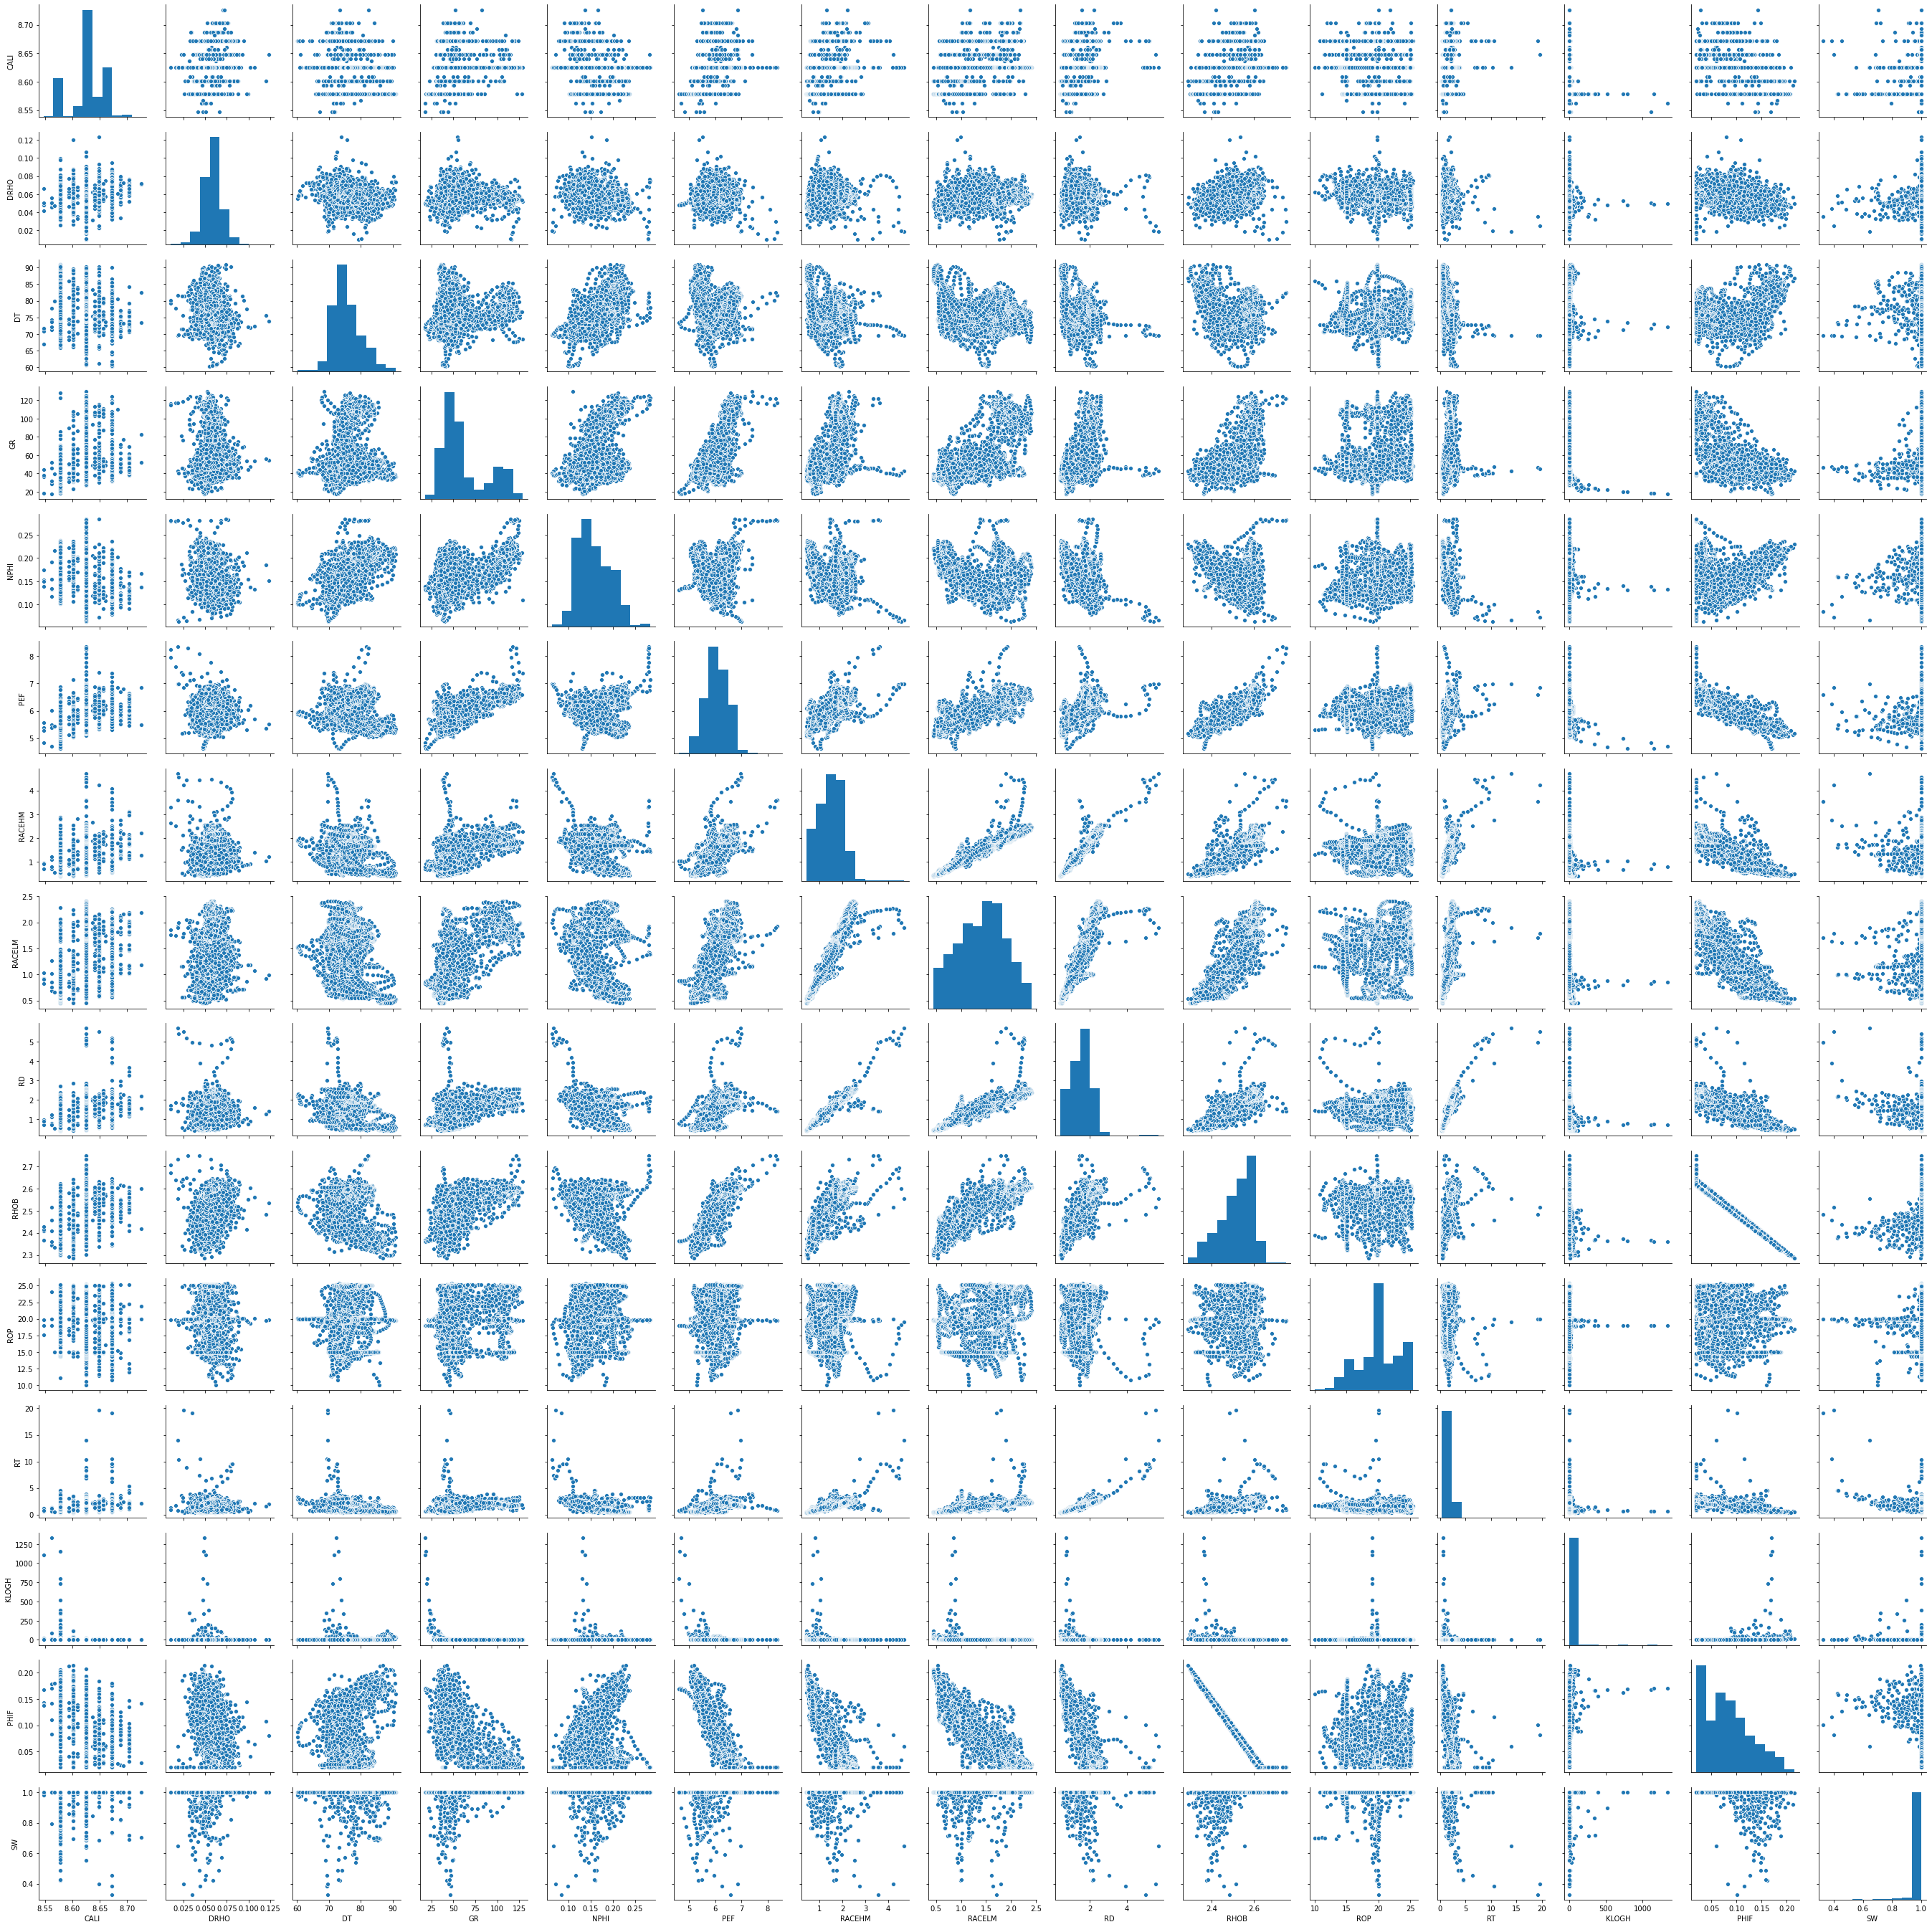

In [9]:
# Matrix of crossplots to visualize the variation between the parameters in the data set.
fig=sns.pairplot(df_data)

# save the heatmap as a file
fig.savefig("Pairplot of well logs.jpg",
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

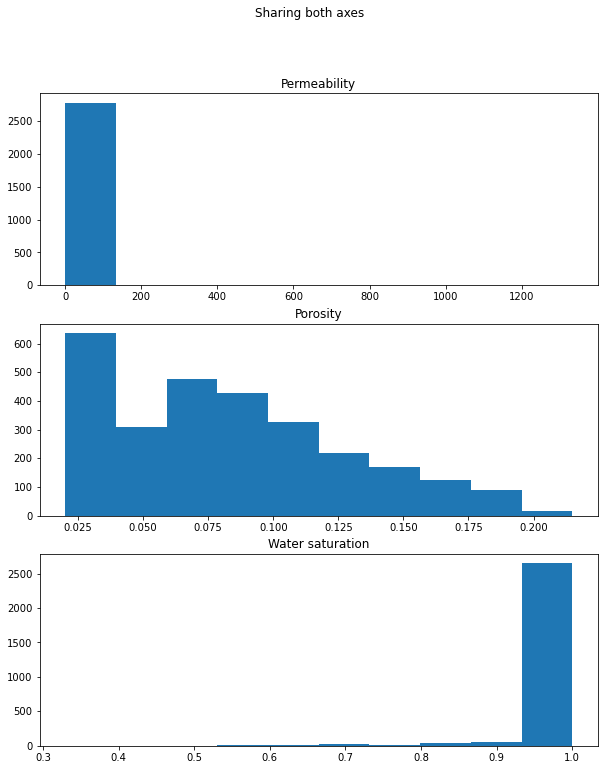

In [11]:
fig, axs = plt.subplots(3, sharex=False, sharey=False, figsize=(10,12))
fig.suptitle('Sharing both axes')
axs[0].hist(df_data.KLOGH)
axs[0].set_title('Permeability')
axs[1].hist(df_data.PHIF)
axs[1].set_title('Porosity')
axs[2].hist(df_data.SW)
axs[2].set_title('Water saturation')

# save the plot as a file
fig.savefig('Histogram of Dependent variables.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build Models With all Features

## Permeability

In [197]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix
yK = df_data[['KLOGH']]
X_train, X_test, yK_train, yK_test = train_test_split(X,yK, test_size = 0.3, random_state = 0)


start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yK_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [198]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yK_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yK_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yK_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yK_test, yhat)))
print(end - start)

R^2: 0.998655
Mean Absolute Error: 2.5525925315890676
Mean Squared Error: 436.9144386087243
Root Mean Squared Error: 20.902498381981143
0.49504852294921875


## Porosity

In [21]:
yp = df_data[['PHIF']]
X_train, X_test, yp_train, yp_test = train_test_split(X,yp, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yp_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yp_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yp_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yp_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp_test, yhat)))
print(end - start)

R^2: 0.997376
Mean Absolute Error: 0.0022567027741785244
Mean Squared Error: 9.72742672017384e-06
Root Mean Squared Error: 0.003118882287001842
0.5603334903717041


## Water saturation

In [31]:
ysw = df_data[['SW']]
X_train, X_test, ysw_train, ysw_test = train_test_split(X,ysw, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, ysw_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, ysw_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(ysw_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(ysw_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ysw_test, yhat)))
print(end - start)

R^2: 0.990692
Mean Absolute Error: 0.003907198138776214
Mean Squared Error: 0.00022229572039983434
Root Mean Squared Error: 0.014909584850016259
0.48462462425231934


# Feature Selection
## The Filter Method

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is using Pearson, Kendall and Spearman correlation.
Here we will  plot the correlation heatmaps and see the correlation of independent variables with the output variables. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.

## Correlation
**Correlation**: a measure of the extent of interdependence between variables.

It is important to know the difference between these two and that correlation does not imply causation.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- **1**: Total positive linear correlation.
- **0**: No linear correlation, the two variables most likely do not affect each other.
- **-1**: Total negative linear correlation.

# Create Heatmap to assess the relationships between the input variables and targets

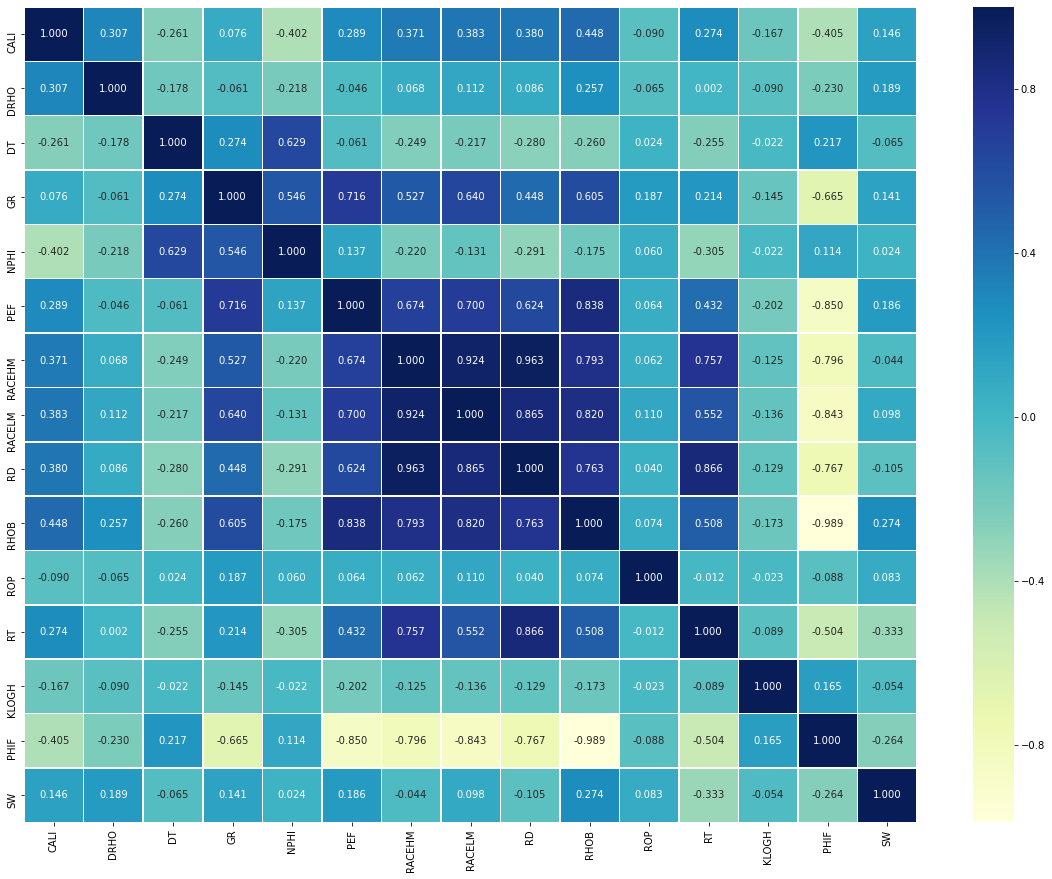

In [33]:
#Using Pearson Correlation
corP = df_data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,15))
corrmap = sns.heatmap(corP, fmt='.3f', annot=True, cmap="YlGnBu", linewidths=.5, ax=ax, cbar=True)

#Set all sides
corrmap.tick_params(right=False, top=False, labelright=False, labeltop=False, rotation=90)

# save the heatmap as a file
fig.savefig('Pearson Correlation.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [34]:
#Correlation with output variable
cor_target = abs(corK["KLOGH"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

KLOGH    1.0
Name: KLOGH, dtype: float64

As we can see, only the features RM, PTRATIO and LSTAT are highly correlated with the output variable MEDV. Hence we will drop all other features apart from these. However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.


From the above code, it is seen that the variables RM and LSTAT are highly correlated with each other (-0.613808). Hence we would keep only one variable and drop the other. We will keep LSTAT since its correlation with MEDV is higher than that of RM.
After dropping RM, we are left with two feature, LSTAT and PTRATIO. These are the final features given by Pearson correlation.

## Building model using Pearson correlated features for porosity

In [35]:
#Correlation with output variable
cor_target = abs(corP["PHIF"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

GR        0.664982
PEF       0.850057
RACEHM    0.796104
RACELM    0.843385
RD        0.767137
RHOB      0.989063
RT        0.504188
PHIF      1.000000
Name: PHIF, dtype: float64

In [36]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['GR', 'RACELM', 'RT', 'PEF', 'RHOB']] #Feature Matrix

X_train, X_test, yp_train, yp_test = train_test_split(X,yp, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yp_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yp_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yp_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yp_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp_test, yhat)))
print(end - start)

R^2: 0.995977
Mean Absolute Error: 0.0026113657080323225
Mean Squared Error: 1.3757933551510287e-05
Root Mean Squared Error: 0.0037091688491507485
0.321444034576416


In [38]:
#Correlation with output variable
cor_target = abs(corS["SW"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

SW    1.0
Name: SW, dtype: float64

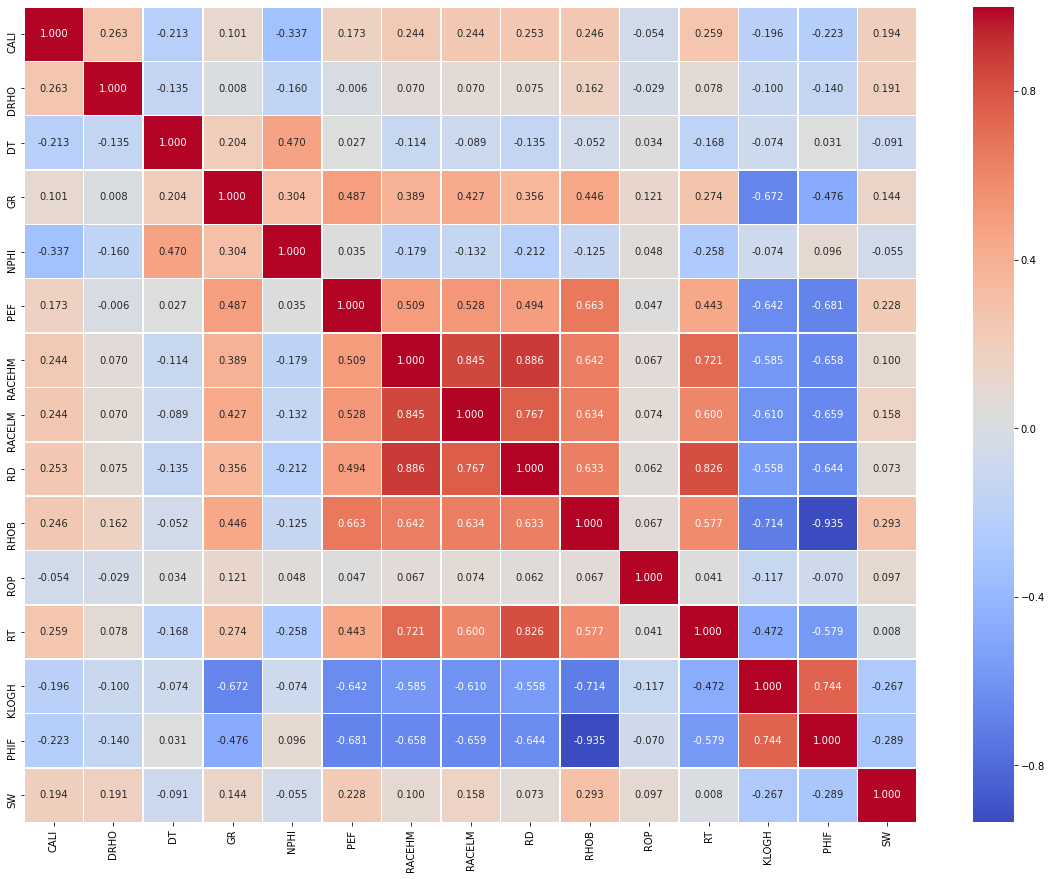

In [39]:
#Using Kendall Correlation
corK = df_data.corr(method='kendall')

fig, ax = plt.subplots(figsize=(20,15))
corrmap = sns.heatmap(corK, fmt='.3f', annot=True, cmap="coolwarm", linewidths=.5, ax=ax, cbar=True)

#Set all sides
corrmap.tick_params(right=False, top=False, labelright=False, labeltop=False, rotation=90)

# save the heatmap as a file
fig.savefig('Kendall Correlation.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [40]:
#Correlation with output variable
cor_target = abs(corK["KLOGH"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

GR        0.672147
PEF       0.641765
RACEHM    0.584994
RACELM    0.609880
RD        0.558134
RHOB      0.714482
KLOGH     1.000000
PHIF      0.743659
Name: KLOGH, dtype: float64

## Build model using Kendall correlated features for Permeability

In [49]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['GR', 'RACELM', 'RD', 'PEF', 'RHOB']] #Feature Matrix
yK = df_data[['KLOGH']]
X_train, X_test, yK_train, yK_test = train_test_split(X,yK, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yK_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yK_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yK_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yK_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yK_test, yhat)))
print(end - start)

R^2: 0.997771
Mean Absolute Error: 2.4892459750384233
Mean Squared Error: 316.61854318990106
Root Mean Squared Error: 17.793778215710713
0.25635814666748047


In [51]:
#Correlation with output variable
cor_target = abs(corK["PHIF"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

PEF       0.680856
RACEHM    0.658201
RACELM    0.659080
RD        0.643811
RHOB      0.935034
RT        0.578827
KLOGH     0.743659
PHIF      1.000000
Name: PHIF, dtype: float64

## Build model using Kendall correlated features for Porosity

In [52]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['RACELM', 'RD', 'RT', 'PEF', 'RHOB']] #Feature Matrix

X_train, X_test, yp_train, yp_test = train_test_split(X,yp, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yp_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yp_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yp_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yp_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp_test, yhat)))
print(end - start)

R^2: 0.994775
Mean Absolute Error: 0.0029915448780140595
Mean Squared Error: 1.630372348416354e-05
Root Mean Squared Error: 0.00403778695378589
0.39964747428894043


In [54]:
#Correlation with output variable
cor_target = abs(corK["SW"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

SW    1.0
Name: SW, dtype: float64

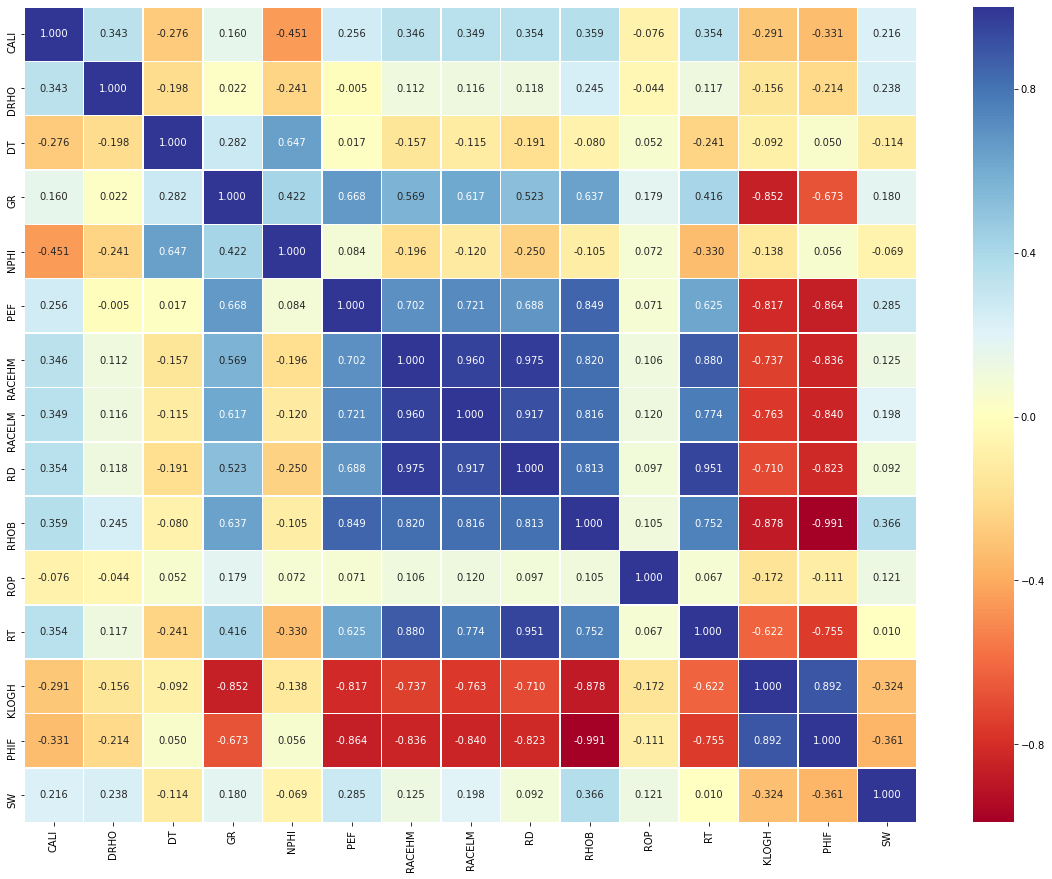

In [55]:
#Using Spearman Correlation
corS = df_data.corr(method='spearman')

fig, ax = plt.subplots(figsize=(20,15))
corrmap = sns.heatmap(corS, fmt='.3f', annot=True, cmap="RdYlBu", linewidths=.5, ax=ax, cbar=True)

#Set all sides
corrmap.tick_params(right=False, top=False, labelright=False, labeltop=False, rotation=90)

# save the heatmap as a file
fig.savefig('Spearman Correlation.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using Spearman correlated features for Permeability

In [56]:
#Correlation with output variable
cor_target = abs(corS["KLOGH"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

GR        0.851711
PEF       0.817496
RACEHM    0.737205
RACELM    0.762789
RD        0.709989
RHOB      0.877763
RT        0.622008
KLOGH     1.000000
PHIF      0.891693
Name: KLOGH, dtype: float64

In [65]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['GR', 'RACELM', 'RD', 'PEF', 'RHOB', 'RT']] #Feature Matrix

X_train, X_test, yp_train, yp_test = train_test_split(X,yp, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yK_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yK_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yK_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yK_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yK_test, yhat)))
print(end - start)

R^2: 0.997697
Mean Absolute Error: 2.015929918371379
Mean Squared Error: 156.99872540433907
Root Mean Squared Error: 12.529913224134438
0.3022615909576416


## Build model using Spearman correlated features for Porosity

In [67]:
#Correlation with output variable
cor_target = abs(corS["PHIF"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

GR        0.673239
PEF       0.863556
RACEHM    0.836112
RACELM    0.839529
RD        0.823467
RHOB      0.990500
RT        0.754582
KLOGH     0.891693
PHIF      1.000000
Name: PHIF, dtype: float64

In [68]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['GR', 'RACELM', 'RD', 'RT', 'PEF', 'RHOB']] #Feature Matrix

X_train, X_test, yp_train, yp_test = train_test_split(X,yp, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yp_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yp_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yp_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yp_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp_test, yhat)))
print(end - start)

R^2: 0.995943
Mean Absolute Error: 0.0026351504485531163
Mean Squared Error: 1.3763686381713307e-05
Root Mean Squared Error: 0.003709944255876806
0.3287503719329834


## Build model using Spearman correlated features for Water saturation

In [70]:
#Correlation with output variable
cor_target = abs(corS["SW"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

SW    1.0
Name: SW, dtype: float64

Can not build model as correlation did not specify any input logs

## Wrapper Method:
The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.
We will first run one iteration here just to get an idea of the concept and then we will run the same code in a loop, which will give the final set of features. Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

You need to define x and y variables

In [71]:
! pip install statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV

     |████████████████████████████████| 9.5MB 6.6MB/s eta 0:00:01     |████████▏                       | 2.4MB 6.6MB/s eta 0:00:02     |██████████████▉                 | 4.4MB 6.6MB/s eta 0:00:01     |███████████████████▊            | 5.8MB 6.6MB/s eta 0:00:01
     |████████████████████████████████| 235kB 6.7MB/s eta 0:00:01


In [72]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(yK,X_1).fit()
model.pvalues

const     4.476425e-08
CALI      1.830605e-08
DRHO      2.451376e-07
DT        3.603869e-02
GR        6.289094e-01
NPHI      8.531194e-01
PEF       1.017790e-12
RACEHM    1.715851e-02
RACELM    3.136140e-01
RD        1.534258e-03
RHOB      4.797660e-04
ROP       6.151361e-02
RT        5.641668e-02
dtype: float64

Features with pvalue greater than 0.05 will be removed to build the model. This is an iterative process and can be performed at once with the help of loop. This approach is implemented below, which would give the final set of variables.

In [73]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix

#Backward Feature Elimination for KLOGH
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(yK,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BFE = cols
print(selected_features_BFE)

['CALI', 'DRHO', 'DT', 'PEF', 'RACEHM', 'RD', 'RHOB', 'ROP']


## Build model using BFE selected features for Permeability

In [82]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['CALI', 'DRHO', 'DT', 'RD', 'RACEHM', 'ROP', 'RHOB', 'PEF']] #Feature Matrix
yK = df_data[['KLOGH']]
X_train, X_test, yK_train, yK_test = train_test_split(X,yK, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yK_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yK_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yK_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yK_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yK_test, yhat)))
print(end - start)

R^2: 0.987492
Mean Absolute Error: 5.36185406687858
Mean Squared Error: 1200.2496414172638
Root Mean Squared Error: 34.6446192274827
0.3457026481628418


#### BFE for PHIF

In [84]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix

#Backward Feature Elimination for PHIF
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(yp,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BFE = cols
print(selected_features_BFE)

['CALI', 'DRHO', 'DT', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'ROP', 'RT']


## Build model using BFE selected features for Porosity

In [87]:
# As all logs were selected, results for baseline was used.

#### BFE for SW

In [88]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix

#Backward Feature Elimination for SW
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(ysw,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BFE = cols
print(selected_features_BFE)

['CALI', 'DRHO', 'DT', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RD', 'RHOB', 'ROP', 'RT']


## Build model using BFE selected features for water saturation

In [97]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['CALI', 'DRHO', 'DT', 'NPHI', 'GR', 'RD', 'RACEHM', 'ROP', 'PEF', 'RHOB', 'RT']] #Feature Matrix

X_train, X_test, ysw_train, ysw_test = train_test_split(X,ysw, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, ysw_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, ysw_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(ysw_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(ysw_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ysw_test, yhat)))
print(end - start)

R^2: 0.990986
Mean Absolute Error: 0.0038170756614283887
Mean Squared Error: 0.00019231764076455639
Root Mean Squared Error: 0.013867863597705178
0.4446070194244385


### RFE (Recursive Feature Elimination)
The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [99]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1)
model = LinearRegression() ##model = LogisticRegression() for classification
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,yK)  
#Fitting the data to model
model.fit(X_rfe,yK)
print(rfe.support_)
print(rfe.ranking_)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True False False  True  True  True False  True  True False False]
[1 1 4 6 1 1 1 2 1 1 5 3]


Here we took LinearRegression model with 7 features and RFE gave feature ranking as above, but the selection of number ‘7’ was random. Now we need to find the optimum number of features, for which the accuracy is the highest. We do that by using loop starting with 1 feature and going up to 15. We then take the one for which the accuracy is highest.

In [100]:
#no of features for Permeability
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, yK_train, yK_test = train_test_split(X,yK, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,yK_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,yK_train)
    score = model.score(X_test_rfe,yK_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was pass

Optimum number of features: 12
Score with 12 features: 0.076511


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


As seen from above code, the optimum number of features is 12. We now feed 12 as number of features to RFE and get the final set of features given by RFE method, as follows:

In [101]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,yK)  
#Fitting the data to model
model.fit(X_rfe,yK)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CALI', 'DRHO', 'DT', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD',
       'RHOB', 'ROP', 'RT'],
      dtype='object')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Porosity

In [102]:
model = LinearRegression()
#Initializing RFE model for porosity
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,yp)  
#Fitting the data to model
model.fit(X_rfe,yp)
print(rfe.support_)
print(rfe.ranking_)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True False False  True False  True  True  True  True False False]
[1 1 6 4 1 2 1 1 1 1 5 3]


In [103]:
#no of features for Porosity
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, yp_train, yp_test = train_test_split(X,yp, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,yp_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,yp_train)
    score = model.score(X_test_rfe,yp_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was pass

Optimum number of features: 12
Score with 12 features: 0.987869


In [104]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,yp)  
#Fitting the data to model
model.fit(X_rfe,yp)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CALI', 'DRHO', 'DT', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD',
       'RHOB', 'ROP', 'RT'],
      dtype='object')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Water saturation

In [105]:
model = LinearRegression()
#Initializing RFE model for porosity
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,ysw)  
#Fitting the data to model
model.fit(X_rfe,ysw)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False  True  True  True  True False  True]
[1 1 4 6 3 2 1 1 1 1 5 1]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
#no of features for Porosity
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, ysw_train, ysw_test = train_test_split(X,ysw, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,ysw_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,ysw_train)
    score = model.score(X_test_rfe,ysw_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was pass

Optimum number of features: 12
Score with 12 features: 0.431731


In [107]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,ysw)  
#Fitting the data to model
model.fit(X_rfe,ysw)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CALI', 'DRHO', 'DT', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD',
       'RHOB', 'ROP', 'RT'],
      dtype='object')


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Embedded Method
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

# Lasso

In [108]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix
reg = LassoCV(cv=5)
reg.fit(X, yK)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,yK))
coef = pd.Series(reg.coef_, index = X.columns)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 171.176116
Best score using built-in LassoCV: 0.002739


In [109]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 11 variables


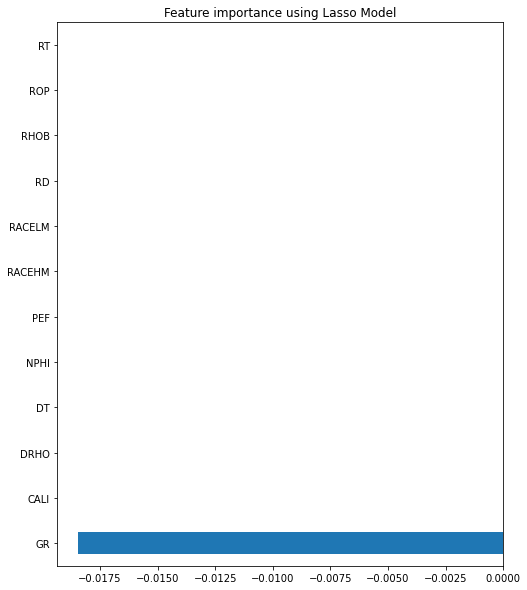

In [110]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")

plt.title("Feature importance using Lasso Model")

# save the chart as a file
fig.savefig('Feature importance using Lasso Model for permeability.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using Lasso selected features for permeability

In [111]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['GR']] #Feature Matrix
yK = df_data[['KLOGH']]
X_train, X_test, yK_train, yK_test = train_test_split(X,yK, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yK_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yK_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yK_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yK_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yK_test, yhat)))
print(end - start)

R^2: 0.986725
Mean Absolute Error: 3.8251420749229457
Mean Squared Error: 384.53984899945146
Root Mean Squared Error: 19.609687631358423
0.12255382537841797


## Porosity

In [113]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix
reg.fit(X, yp)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,yp))
coef = pd.Series(reg.coef_, index = X.columns)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 0.000779
Best score using built-in LassoCV: 0.849249


In [114]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 7 variables


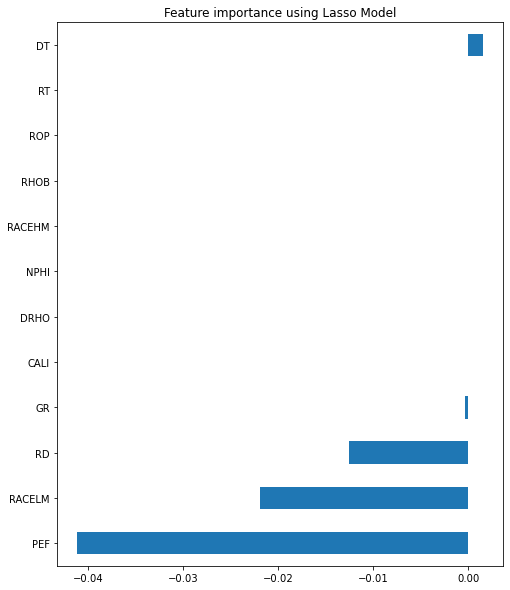

In [115]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# save the chart as a file
fig.savefig('Feature importance using Lasso Model for porosity.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using Lasso selected features for porosity

In [116]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['DT',  'GR', 'RACELM', 'RD', 'PEF']] #Feature Matrix

X_train, X_test, yp_train, yp_test = train_test_split(X,yp, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yp_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yp_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yp_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yp_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp_test, yhat)))
print(end - start)

R^2: 0.935599
Mean Absolute Error: 0.010106889912879016
Mean Squared Error: 0.00018791789464834207
Root Mean Squared Error: 0.013708314799724366
0.2977182865142822


## Water saturation

In [118]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix
reg.fit(X, ysw)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,ysw))
coef = pd.Series(reg.coef_, index = X.columns)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 0.000202
Best score using built-in LassoCV: 0.384201


In [119]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 8 variables and eliminated the other 4 variables


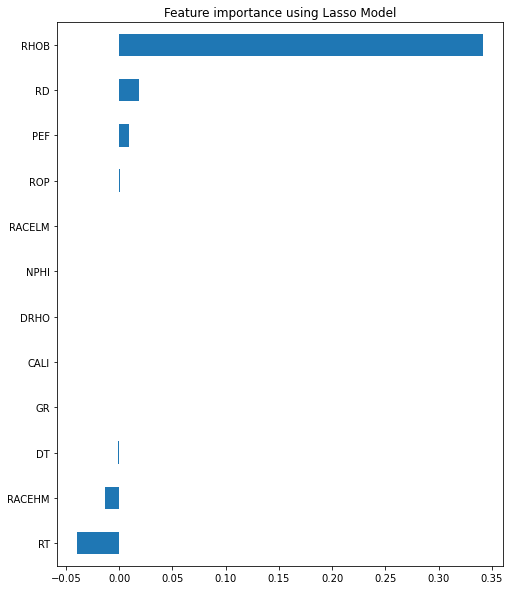

In [120]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# save the chart as a file
fig.savefig('Feature importance using Lasso Model for water saturation.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using Lasso selected features for water saturation

In [129]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['RD', 'RACEHM', 'ROP', 'DT', 'PEF', 'RHOB', 'RT']] #Feature Matrix

X_train, X_test, ysw_train, ysw_test = train_test_split(X,ysw, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, ysw_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, ysw_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(ysw_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(ysw_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ysw_test, yhat)))
print(end - start)

R^2: 0.991074
Mean Absolute Error: 0.0034357859498534977
Mean Squared Error: 0.00014349324862765006
Root Mean Squared Error: 0.011978866750559088
0.36031675338745117


# Intrinsic Method
## Random forest

## Permeability

In [131]:
from sklearn.ensemble import RandomForestRegressor
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X,yK)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

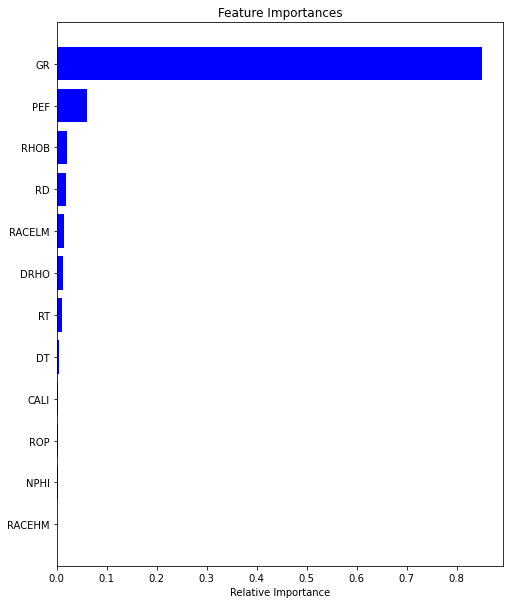

In [132]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-12:]  # top 12 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# save the chart as a file
fig.savefig('Feature importance using Random Forest for permeability.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using Random Forest selected features for permeability

In [193]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['GR', 'RACELM', 'DRHO', 'DT', 'RT', 'RD', 'PEF', 'RHOB']] #Feature Matrix
yK = df_data[['KLOGH']]
X_train, X_test, yK_train, yK_test = train_test_split(X,yK, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yK_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [194]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yK_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yK_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yK_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yK_test, yhat)))
print(end - start)

R^2: 0.998273
Mean Absolute Error: 1.9395567924218295
Mean Squared Error: 137.81826314980765
Root Mean Squared Error: 11.739602342064558
0.3878035545349121


## Porosity

In [143]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix
modelp = RandomForestRegressor(random_state=1, max_depth=10)
modelp.fit(X,yp)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

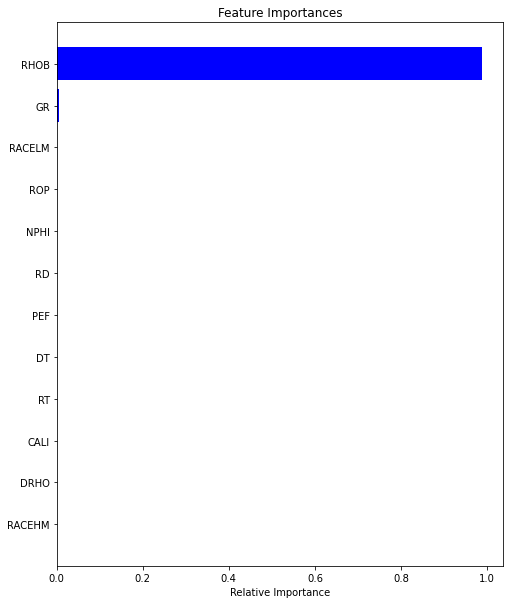

In [144]:
features = X.columns
importances = modelp.feature_importances_
indices = np.argsort(importances)[-12:]  # top 12 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# save the chart as a file
fig.savefig('Feature importance using Random Forest for porosity.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using Random Forest selected features for porosity

In [145]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['RHOB', 'GR']] #Feature Matrix

X_train, X_test, yp_train, yp_test = train_test_split(X,yp, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yp_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yp_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yp_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yp_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp_test, yhat)))
print(end - start)

R^2: 0.994093
Mean Absolute Error: 0.003258806444625274
Mean Squared Error: 1.8844674428668712e-05
Root Mean Squared Error: 0.004341045315205626
0.16563081741333008


## Water saturation

In [147]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix
modelsw = RandomForestRegressor(random_state=1, max_depth=10)
modelsw.fit(X,ysw)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

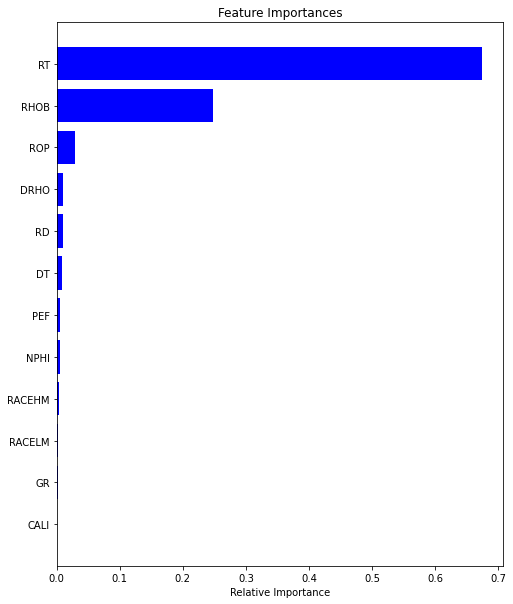

In [148]:
features = X.columns
importances = modelsw.feature_importances_
indices = np.argsort(importances)[-12:]  # top 12 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# save the chart as a file
fig.savefig('Feature importance using Random Forest for water saturation.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using Random Forest selected features for water saturation

In [157]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['ROP', 'RACEHM', 'NPHI', 'DRHO', 'DT', 'RT', 'RD', 'PEF', 'RHOB']] #Feature Matrix

X_train, X_test, ysw_train, ysw_test = train_test_split(X,ysw, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, ysw_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, ysw_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(ysw_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(ysw_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ysw_test, yhat)))
print(end - start)

R^2: 0.991579
Mean Absolute Error: 0.0036483553496518876
Mean Squared Error: 0.000225660632234403
Root Mean Squared Error: 0.015022004933909554
0.4073977470397949


## Univariate Feature Selection Method

The correlation scores used are generally values ranging from -1 to 1 with 0 representing indicating the existence of no relationship. In feature selection process, the interest often lies with positive scores where the larger positive scores indicates a higher relationship with the target. This gives an indication of the relevant variables that should be used in training machine learning models. Hence, the correlations used should be transformed into only positive correlation statistic values. The f_regression() function was implemented for this statistical feature selection process to augment the results from P-values. This techniques uses the SelectKBest class to selects the most relevant k values with the highest scores.

For example, we can define the SelectKBest class to use the f_regression() function and select all features, then transform the train and test sets.

In [159]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix
# feature selection
def select_features(X_train, yK_train, X_test):
# configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
    fs.fit(X_train, yK_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 45.467301
Feature 1: 17.188743
Feature 2: 0.038497
Feature 3: 34.376018
Feature 4: 0.433719
Feature 5: 68.448855
Feature 6: 28.325731
Feature 7: 34.638355
Feature 8: 29.681866
Feature 9: 56.622130
Feature 10: 0.716674
Feature 11: 14.699240


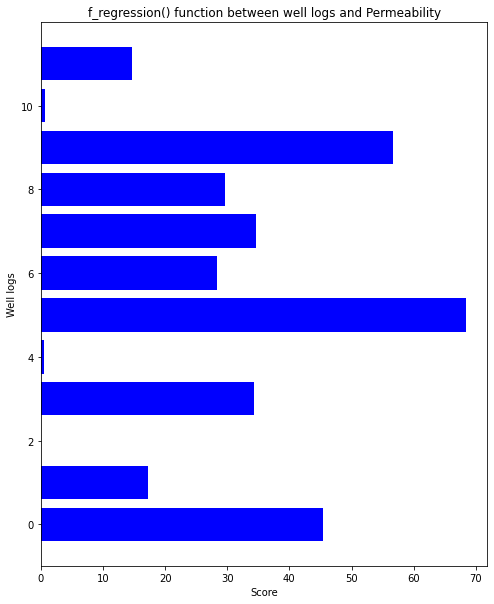

<Figure size 576x720 with 0 Axes>

In [160]:
# split into train and test sets
X_train, X_test, yK_train, yK_test = train_test_split(X, yK, test_size=0.30, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, yK_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.barh([i for i in range(len(fs.scores_))], fs.scores_, color='b', align='center')
plt.title('f_regression() function between well logs and Permeability')
plt.xlabel('Score')
plt.ylabel('Well logs')
plt.show()

# save the chart as a file
plt.savefig('f_regression() function between well logs and Permeability.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using SelectKBest top 5 selected features for permeability

In [191]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['CALI', 'GR', 'RACELM', 'PEF', 'RHOB']] #Feature Matrix
yK = df_data[['KLOGH']]
X_train, X_test, yK_train, yK_test = train_test_split(X,yK, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yK_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [192]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yK_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yK_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yK_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yK_test, yhat)))
print(end - start)

R^2: 0.997614
Mean Absolute Error: 1.9848607889601368
Mean Squared Error: 136.95263726549217
Root Mean Squared Error: 11.702676500078612
0.2560691833496094


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 379.489081
Feature 1: 99.453583
Feature 2: 132.228378
Feature 3: 1529.549465
Feature 4: 35.629715
Feature 5: 5212.228399
Feature 6: 3468.673155
Feature 7: 4886.488840
Feature 8: 2914.802494
Feature 9: 89769.833204
Feature 10: 17.221540
Feature 11: 818.888653


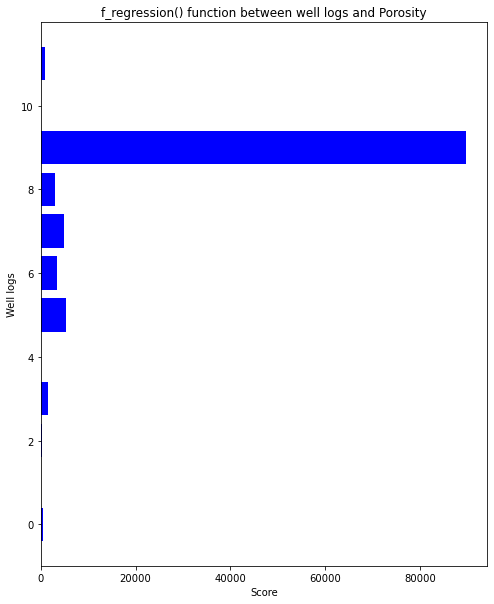

<Figure size 576x720 with 0 Axes>

In [171]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix

# split into train and test sets
X_train, X_test, yp_train, yp_test = train_test_split(X, yp, test_size=0.30, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, yp_train, X_test)
# what are scores for the featuresp
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.barh([i for i in range(len(fs.scores_))], fs.scores_, color='b', align='center')
plt.title('f_regression() function between well logs and Porosity')
plt.xlabel('Score')
plt.ylabel('Well logs')
plt.show()

# save the chart as a file
plt.savefig('f_regression() function between well logs and Porosity.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using SelectKBest selected features for porosity

In [172]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['RT', 'CALI', 'RHOB', 'RACELM', 'RACEHM', 'RD', 'PEF', 'GR']] #Feature Matrix

X_train, X_test, yp_train, yp_test = train_test_split(X,yp, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, yp_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, yp_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(yp_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(yp_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yp_test, yhat)))
print(end - start)

R^2: 0.996316
Mean Absolute Error: 0.0025375261048179065
Mean Squared Error: 1.2616427133541826e-05
Root Mean Squared Error: 0.003551961026467186
0.41944122314453125


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 43.965143
Feature 1: 66.662649
Feature 2: 12.164632
Feature 3: 42.305827
Feature 4: 0.280991
Feature 5: 80.064961
Feature 6: 0.334680
Feature 7: 24.086563
Feature 8: 7.133546
Feature 9: 167.287127
Feature 10: 15.467016
Feature 11: 122.964768


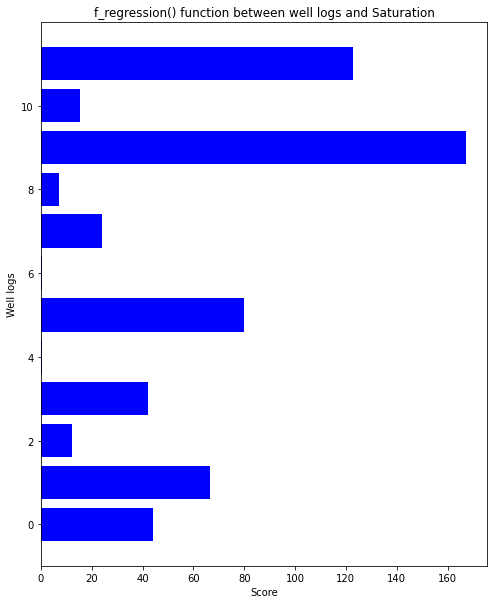

<Figure size 576x720 with 0 Axes>

In [174]:
X = df_data.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix

# split into train and test sets
X_train, X_test, ysw_train, ysw_test = train_test_split(X, ysw, test_size=0.30, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, ysw_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.barh([i for i in range(len(fs.scores_))], fs.scores_, color='b', align='center')
plt.title('f_regression() function between well logs and Saturation')
plt.xlabel('Score')
plt.ylabel('Well logs')
plt.show()

# save the chart as a file
plt.savefig('f_regression() function between well logs and Saturation.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

## Build model using SelectKBest top 5 selected features for water saturation

In [183]:
# Let's select appropriate variables as some logs are redundant or similar.
X = df_data[['RT', 'CALI', 'RHOB', 'ROP', 'DRHO', 'RACELM', 'PEF', 'GR']] #Feature Matrix

X_train, X_test, ysw_train, ysw_test = train_test_split(X,ysw, test_size = 0.3, random_state = 0)

start = time.time()

# create model and train/fit
GBR = GradientBoostingRegressor()
GBR.fit(X_train, ysw_train)

# evaluate the model
yhat = GBR.predict(X_test)

end = time.time()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [184]:
# evaluate predictions
print("R^2: {:g}".format(GBR.score(X_train, ysw_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(ysw_test, yhat))  
print('Mean Squared Error:', metrics.mean_squared_error(ysw_test, yhat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ysw_test, yhat)))
print(end - start)

R^2: 0.991162
Mean Absolute Error: 0.0037520334633043386
Mean Squared Error: 0.00016113838956611584
Root Mean Squared Error: 0.012694029681945598
0.3628883361816406


The results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

A bar chart of the feature importance scores for each input feature is created.

We could set k=x When configuring the SelectKBest to select these x top features.

## Explanation for using the selected models for prediction
- Build model using all features
- Build model using only correlated features assuming they are different from the ones using the other techniques
- Build model using the features selected from the models

This suggests that although the method has a strong idea of what features to select, building a model from these features alone does not result in a more skillful model. This could be because features that are important to the target are being left out, meaning that the method is being deceived about what is important.

In this tutorial, you discovered how to perform feature selection with numerical input data for regression predictive modeling.

Specifically, you learned:

How to evaluate the importance of numerical input data using the correlation and mutual information statistics.
How to perform feature selection for numerical input data when fitting and evaluating a regression model.
How to tune the number of features selected in a modeling pipeline using a grid search.

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance. However, all variables will be inputed to see if the machine learning model will be robust enough to use only relevant features

### Apply the feature selection technique to another well data

In [7]:
df2 = pd.read_csv('15_9-F-11.csv')
df.head()

Depth    CALI    DRHO       DT        GR    NPHI     PEF  RACEHM  RACELM  \
0  3319.7  8.6250  0.0522  68.4529  129.2796  0.1098  7.3899  2.2658  1.7305   
1  3319.8  8.6250  0.0698  68.2099   94.5679  0.1054  7.0959  2.2316  1.7552   
2  3319.9  8.6250  0.0834  67.8057   72.4837  0.1051  6.7799  1.7440  1.6347   
3  3320.0  8.6250  0.0897  67.1666   58.2152  0.1047  6.4901  1.6227  1.6219   
4  3320.1  8.6016  0.0875  66.6090   52.7115  0.1061  6.2783  1.8232  1.6507   

       RD  ...      ROP  RPCEHM  RPCELM      RT     BVW   KLOGH    PHIF  \
0  1.4654  ...  19.7997  1.3082  1.4654  1.3082  0.0200  0.0010  0.0200   
1  1.5045  ...  19.7936  1.4833  1.5045  1.4833  0.0200  0.0010  0.0200   
2  1.7399  ...  19.8061  1.9602  1.7400  1.9602  0.0200  0.0017  0.0200   
3  1.9330  ...  19.8185  2.4704  1.9330  2.4704  0.0238  0.0306  0.0238   
4  1.9649  ...  19.8310  2.5638  1.9649  2.5638  0.0413  0.1252  0.0413   

   SAND_FLAG   SW     VSH  
0          0  1.0  0.7446  
1          0  1.0  0.7582  
2          0  1.0  0.5477  
3          0  1.0  0.4117  
4          0  1.0  0.3592  

[5 rows x 22 columns]

In [8]:
# Let's select appropriate variables as some logs are redundant or similar.

df21 = df2.drop(['Depth', 'VSH', 'BVW', 'DTS', 'SAND_FLAG', 'RPCEHM', 'RPCELM', 'RM'], 1)

df21.head(10)

CALI   DRHO      DT       GR   NPHI    PEF  RACEHM  RACELM     RD   RHOB  \
0  8.703  0.047  85.625  101.957  0.229  6.843   2.099   2.267  2.228  2.462   
1  8.703  0.050  84.718   98.409  0.219  6.817   2.128   2.271  2.139  2.480   
2  8.703  0.054  83.734   96.745  0.214  6.792   2.128   2.259  2.093  2.497   
3  8.703  0.057  82.677   96.132  0.214  6.779   2.081   2.221  2.124  2.510   
4  8.687  0.057  81.456   95.004  0.216  6.800   2.040   2.177  2.128  2.514   
5  8.672  0.052  80.836   94.833  0.214  6.869   2.017   2.157  2.106  2.513   
6  8.672  0.046  81.743   92.694  0.209  6.956   1.986   2.128  2.091  2.510   
7  8.693  0.042  82.183   92.471  0.202  7.019   1.940   2.096  2.072  2.511   
8  8.672  0.041  82.529   90.887  0.203  7.042   1.920   2.070  2.015  2.516   
9  8.672  0.045  83.008   91.212  0.205  7.037   1.925   2.063  1.929  2.526   

      ROP     RT  KLOGH   PHIF   SW  
0  10.357  2.422  0.001  0.119  1.0  
1  10.148  2.204  0.001  0.109  1.0  
2   9.938  2.089  0.001  0.098  1.0  
3   9.729  2.194  0.001  0.091  1.0  
4  10.004  2.261  0.001  0.088  1.0  
5  10.279  2.249  0.001  0.089  1.0  
6  10.554  2.231  0.001  0.090  1.0  
7  11.559  2.231  0.001  0.090  1.0  
8  12.564  2.135  0.001  0.087  1.0  
9  13.568  1.942  0.001  0.081  1.0

In [9]:
# Count missing data if present
missing_df21 = df21.isnull()
for column in missing_df21.columns.values.tolist():
    print(column)
    print (missing_df21[column].value_counts())
    print("")

CALI
False    1783
Name: CALI, dtype: int64

DRHO
False    1783
Name: DRHO, dtype: int64

DT
False    1783
Name: DT, dtype: int64

GR
False    1783
Name: GR, dtype: int64

NPHI
False    1783
Name: NPHI, dtype: int64

PEF
False    1783
Name: PEF, dtype: int64

RACEHM
False    1783
Name: RACEHM, dtype: int64

RACELM
False    1783
Name: RACELM, dtype: int64

RD
False    1783
Name: RD, dtype: int64

RHOB
False    1783
Name: RHOB, dtype: int64

ROP
False    1783
Name: ROP, dtype: int64

RT
False    1783
Name: RT, dtype: int64

KLOGH
False    1783
Name: KLOGH, dtype: int64

PHIF
False    1783
Name: PHIF, dtype: int64

SW
False    1783
Name: SW, dtype: int64



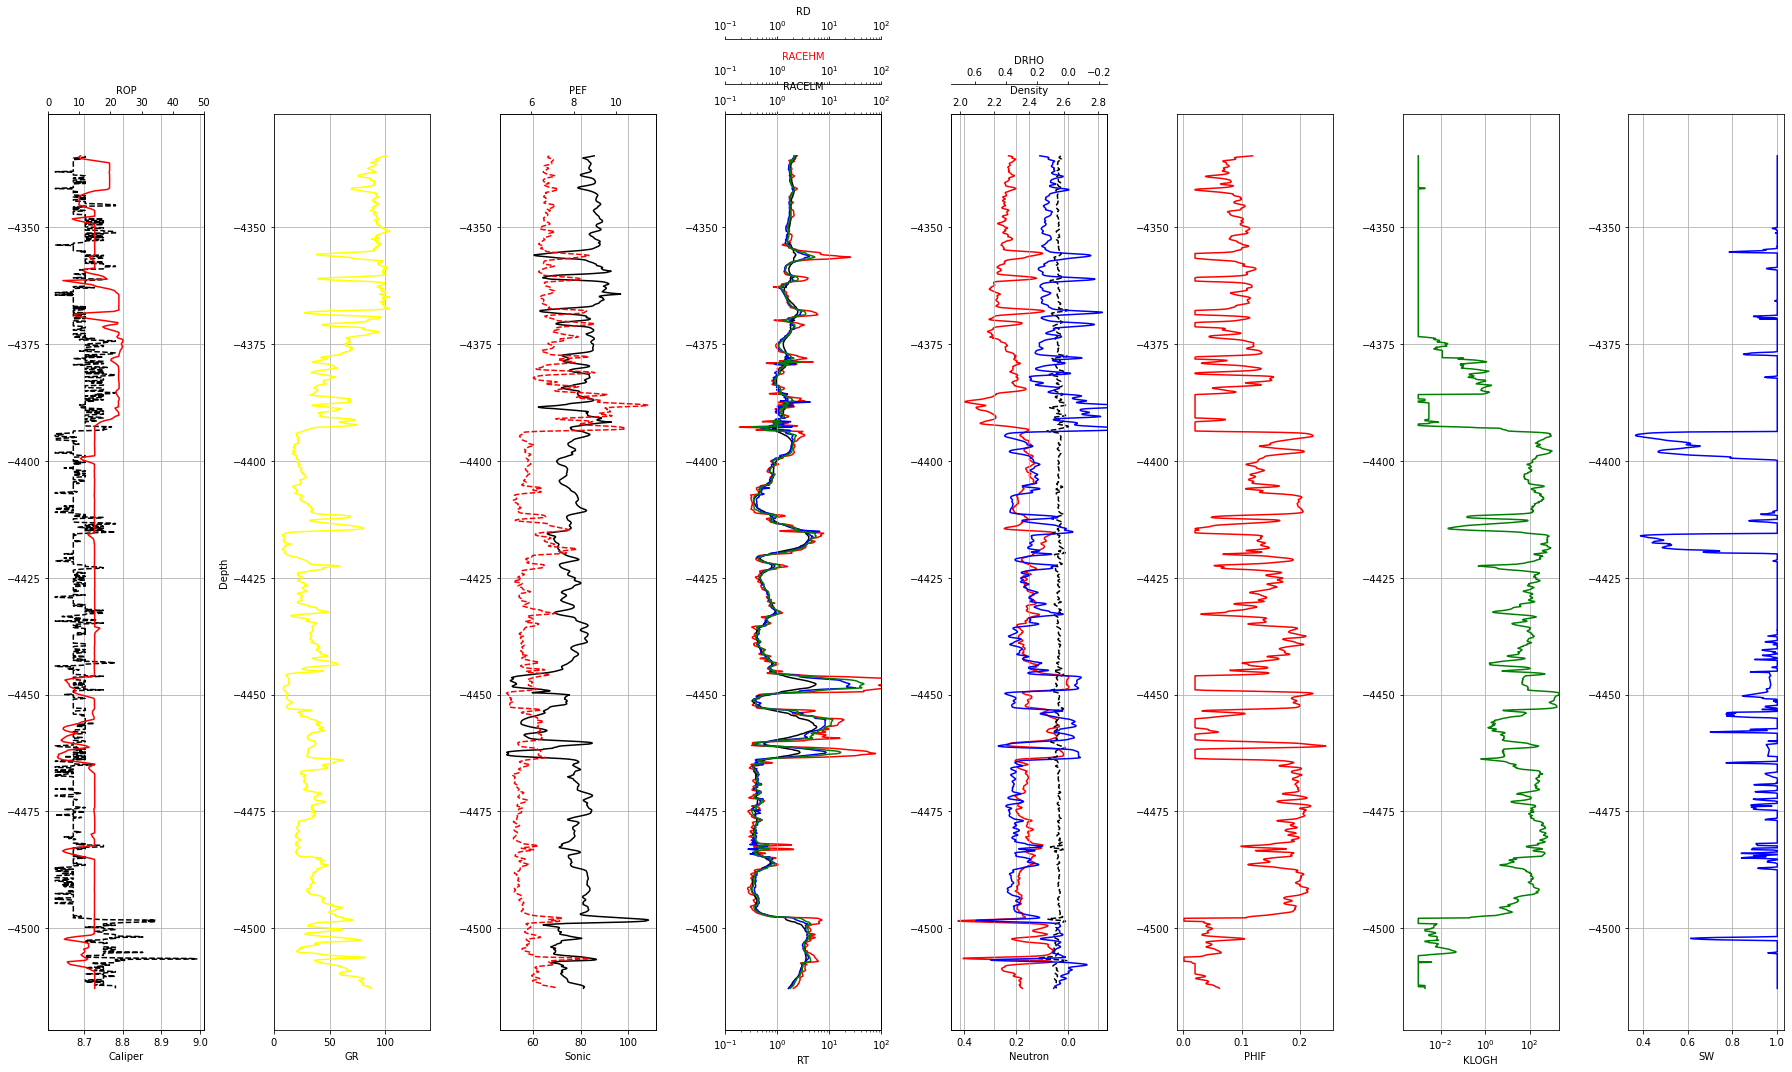

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(25, 15))

axes[0].plot(df2.CALI, -df2.Depth, c="black", linestyle='--')
axes[0].set_xlabel("Caliper", color='black')
axes0= axes[0].twiny()
axes0.plot(df2.ROP, -df2.Depth, c="red")
axes0.set_xlabel("ROP", color="black")
axes0.set_xlim(0, 50)
axes[0].grid(which='both', axis='both')

axes[1].plot(df2.GR, -df2.Depth, c="yellow")
axes[1].set_xlim([0, 140])
axes[1].set_ylabel("Depth")
axes[1].set_xlabel("GR")
axes[1].get_yaxis().set_visible(True)
axes[1].grid(which='both', axis='both')

axes[2].plot(df2.DT, -df2.Depth, c="black")
axes[2].set_xlabel("Sonic")
axes[2].get_yaxis().set_visible(True)
axes2= axes[2].twiny()
axes2.plot(df2.PEF, -df2.Depth, c="red", linestyle='--')
axes2.set_xlabel("PEF", color="black")
axes[2].grid(which='both', axis='both')

axes[3].plot(df2.RT, -df2.Depth, c="red")
axes[3].set_xlabel("RT")
axes[3].set_xscale('log')
axes[3].grid(True)
axes[3].get_yaxis().set_visible(True)
axes[3].set_xlim(0.1, 100)
axes[3].grid(True, which="both")

axes3= axes[3].twiny()
axes3.plot(df2.RACELM, -df2.Depth, c="black")
axes3.set_xlabel("RACELM")
axes3.set_xscale('log')
axes3.set_xlim(0.1, 100)

axes3_1= axes[3].twiny()
axes3_1.plot(df2.RACEHM, -df2.Depth, c="blue")
axes3_1.set_xlabel("RACEHM", color="red")
axes3_1.set_xscale('log')
axes3_1.spines['top'].set_position(('outward', 30))
axes3_1.set_xlim(0.1, 100)

axes3_2= axes[3].twiny()
axes3_2.plot(df2.RD, -df2.Depth, c="green")
axes3_2.set_xlabel("RD")
axes3_2.set_xscale('log')
axes3_2.spines['top'].set_position(('outward', 75))
axes3_2.set_xlim(0.1, 100)
plt.grid(True)
axes[3].grid(which='both', axis='both')

axes[4].plot(df2.NPHI, -df2.Depth, c="red")
axes[4].set_xlabel("Neutron")
axes[4].invert_xaxis()
axes[4].set_xlim(0.45, -0.15)
axes[4].get_yaxis().set_visible(False)

axes4= axes[4].twiny()
axes4.plot(df2.DRHO, -df2.Depth, c="black", linestyle='--')
axes4.set_xlabel("DRHO")
axes4.get_yaxis().set_visible(True)
axes4.set_xlim(0.75, -0.25)
axes4.spines['top'].set_position(('outward', 30))

axes4_1= axes[4].twiny()
axes4_1.plot(df2.RHOB, -df2.Depth, c="blue")
axes4_1.set_xlabel("Density")
axes4_1.set_xlim(1.95, 2.85)
axes[4].grid(which='major', axis='both')

axes[5].plot(df2.PHIF, -df2.Depth, c="red")
axes[5].set_xlabel("PHIF")
axes[5].get_yaxis().set_visible(True)
axes[5].grid(which='both', axis='both')

axes[6].plot(df2.KLOGH, -df2.Depth, c="green")
axes[6].set_xlabel("KLOGH")
axes[6].set_xscale('log')
axes[6].set_xlim(0.0002, 2000)
axes[6].get_yaxis().set_visible(True)
plt.grid(True)
axes[6].grid(which='both', axis='both')

axes[7].plot(df2.SW, -df2.Depth, c="blue")
axes[7].set_xlabel("SW")
axes[7].get_yaxis().set_visible(True)
axes[7].grid(which='major', axis='both')

fig.tight_layout()

# save the plot as a file
fig.savefig('Well logs_New.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 113.108550
Feature 1: 46.478831
Feature 2: 18.956302
Feature 3: 349.863196
Feature 4: 44.893408
Feature 5: 159.374223
Feature 6: 13.070745
Feature 7: 47.596151
Feature 8: 8.093082
Feature 9: 268.548986
Feature 10: 21.839209
Feature 11: 2.763396


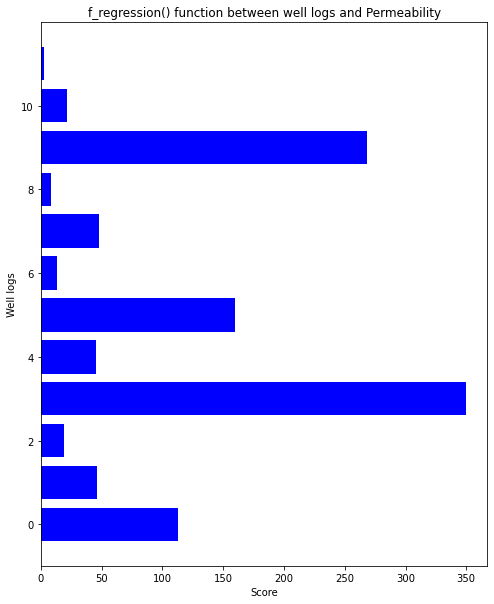

In [162]:
X = df21.drop(["KLOGH", "PHIF", "SW"], axis=1) #Feature Matrix
yK = df21[["KLOGH"]]
# feature selection
def select_features(X_train, yK_train, X_test):
# configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
    fs.fit(X_train, yK_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# split into train and test sets
X_train, X_test, yK_train, yK_test = train_test_split(X, yK, test_size=0.30, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, yK_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.barh([i for i in range(len(fs.scores_))], fs.scores_, color='b', align='center')
plt.title('f_regression() function between well logs and Permeability')
plt.xlabel('Score')
plt.ylabel('Well logs')
plt.show()